# Week1

Data Exploration:

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:
    * Glucose
    * BloodPressure
    * SkinThickness
    * Insulin
    * BMI
2. Visually explore these variables using histograms. Treat the missing values accordingly.
3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

In [1]:
import dask.dataframe as dd
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, f1_score
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, Normalizer, MaxAbsScaler, StandardScaler

sns.set()

In [2]:
df = pd.read_csv('health_Care_diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.loc[:,['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578
std,31.972618,19.355807,15.952218,115.244002,7.884160
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000
50%,117.000000,72.000000,23.000000,30.500000,32.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

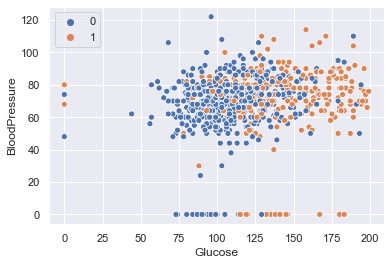

In [6]:
sns.scatterplot(x= "Glucose" ,y= "BloodPressure",
              hue=df.Outcome.to_list(),
              data=df)

In [7]:
# Glucose and Bloodpressure have postivie correlation

<AxesSubplot:xlabel='BMI', ylabel='Insulin'>

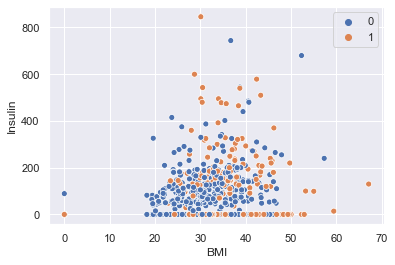

In [8]:
sns.scatterplot(x= "BMI" ,y= "Insulin",
              hue=df.Outcome.to_list(),
              data=df)

In [9]:
# BMI and Insulin have postivie correlation

<AxesSubplot:xlabel='SkinThickness', ylabel='Insulin'>

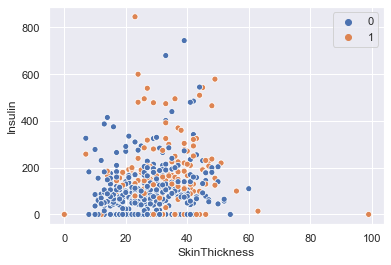

In [10]:
sns.scatterplot(x= "SkinThickness" ,y= "Insulin",
              hue=df.Outcome.to_list(),
              data=df)

In [11]:
# SkinThickness and Insulin have postivie correlation

<AxesSubplot:>

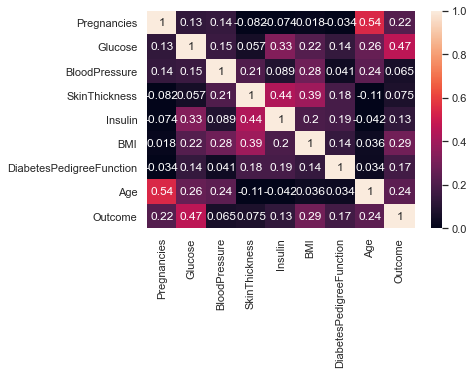

In [74]:
sns.heatmap(df.corr(), vmin=0, vmax=1,annot=True)

In [75]:
# Age and pregnancies, Glucose and Outcome, glucose and insulin, bloodpressure and age, BMI and skinthickness, BMI and age, BMI an dBloodpressure are highly correlated fields

C:\Users\Pritesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

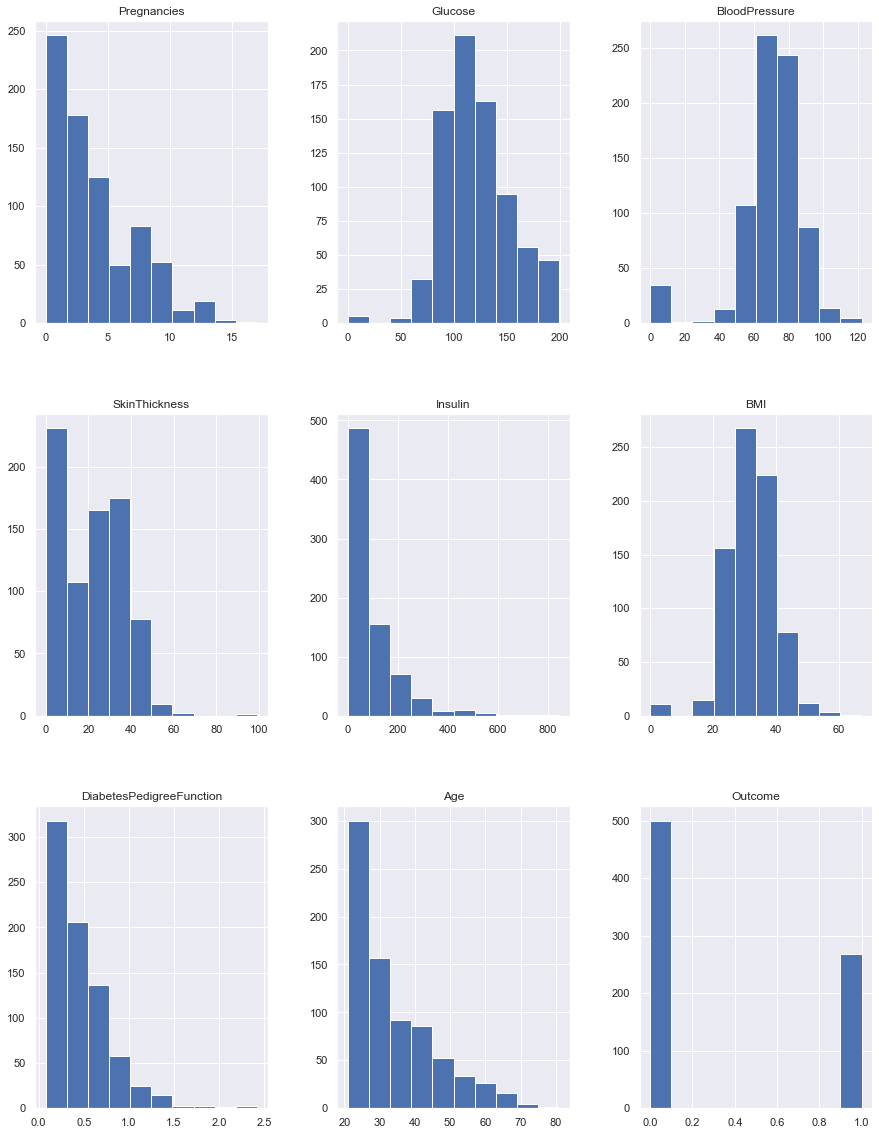

In [13]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax=ax, grid=True)

<AxesSubplot:xlabel='BMI', ylabel='count'>

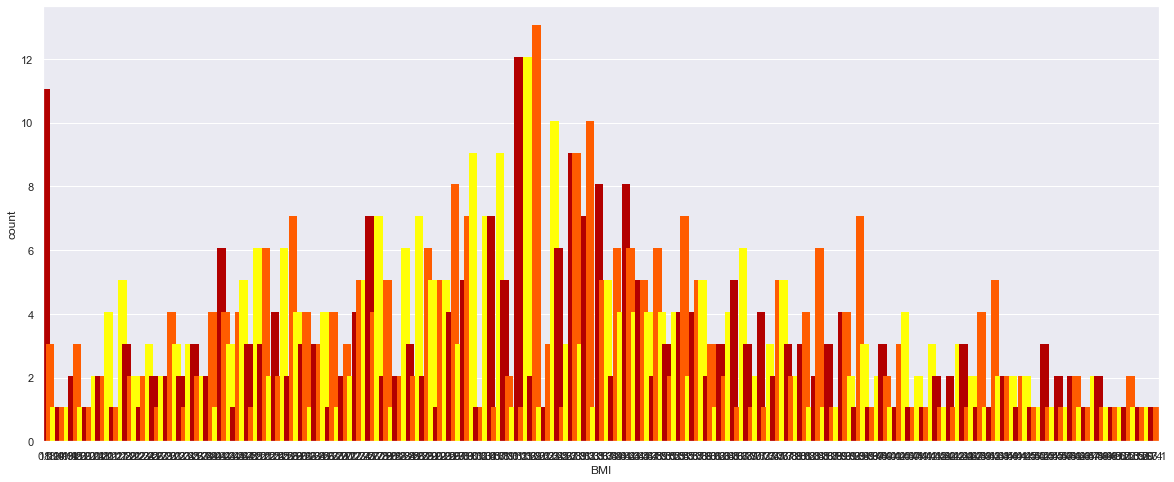

In [14]:
plt.figure(figsize=(20,8))
sns.countplot(x='BMI',data = df ,facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("hot", 3))

## Correlation

In [15]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Standard Deviation
##### Standard deviation is a number used to tell how measurements for a group are spread out from the average (mean), or expected value. A low standard deviation means that most of the numbers are close to the average. A high standard deviation means that the numbers are more spread out.

In [16]:
df.apply(np.std)

Pregnancies                   3.367384
Glucose                      31.951796
BloodPressure                19.343202
SkinThickness                15.941829
Insulin                     115.168949
BMI                           7.879026
DiabetesPedigreeFunction      0.331113
Age                          11.752573
Outcome                       0.476641
dtype: float64

<AxesSubplot:>

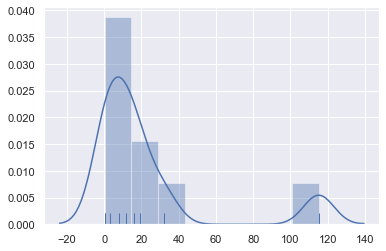

In [17]:
sns.distplot(df.apply(np.std),rug=True)

## Variance
##### A small variance indicates that the data points tend to be very close to the mean, and to each other. A high variance indicates that the data points are very spread out from the mean, and from one another. Variance is the average of the squared distances from each point to the mean.

In [18]:
df.apply(np.var)

Pregnancies                    11.339272
Glucose                      1020.917262
BloodPressure                 374.159449
SkinThickness                 254.141900
Insulin                     13263.886875
BMI                            62.079046
DiabetesPedigreeFunction        0.109636
Age                           138.122964
Outcome                         0.227186
dtype: float64

<AxesSubplot:>

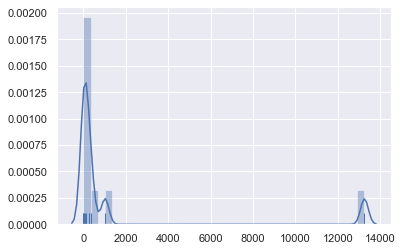

In [19]:
sns.distplot(df.apply(np.var),rug=True)

Mean of Glucose level is :- 120.89453125
Datatype of Glucose Variable is: int64


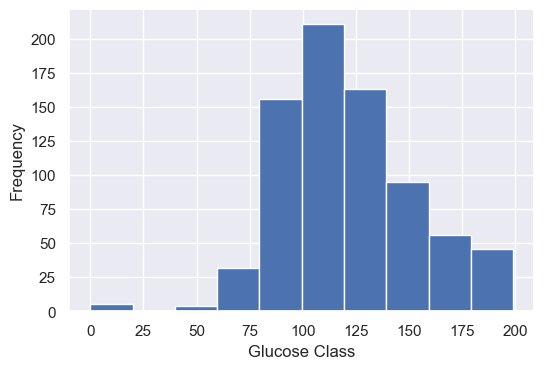

In [20]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('Glucose Class')
df['Glucose'].plot.hist()
print("Mean of Glucose level is :-", df['Glucose'].mean())
print("Datatype of Glucose Variable is:",df['Glucose'].dtypes)

Mean of BloodPressure level is :- 69.10546875
Datatype of BloodPressure Variable is: int64


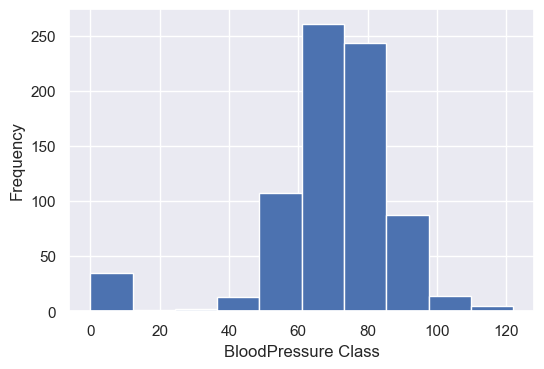

In [21]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('BloodPressure Class')
df['BloodPressure'].plot.hist()
print("Mean of BloodPressure level is :-", df['BloodPressure'].mean())
print("Datatype of BloodPressure Variable is:",df['BloodPressure'].dtypes)

Mean of SkinThickness is :- 20.536458333333332
Datatype of SkinThickness Variable is: int64


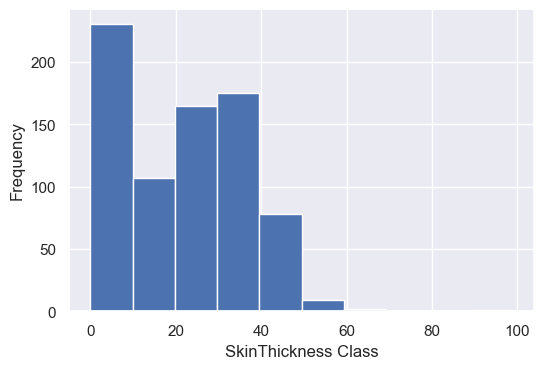

In [22]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('SkinThickness Class')
df['SkinThickness'].plot.hist()
print("Mean of SkinThickness is :-", df['SkinThickness'].mean())
print("Datatype of SkinThickness Variable is:",df['SkinThickness'].dtypes)

Mean of Insulin is :- 79.79947916666667
Datatype of Insulin Variable is: int64


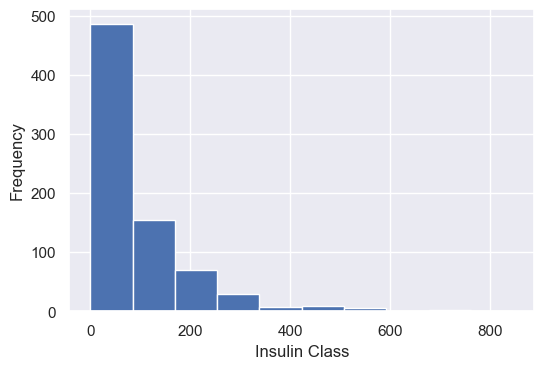

In [23]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('Insulin Class')
df['Insulin'].plot.hist()
print("Mean of Insulin is :-", df['Insulin'].mean())
print("Datatype of Insulin Variable is:",df['Insulin'].dtypes)

Mean of Insulin is :- 79.79947916666667
Datatype of Insulin Variable is: int64


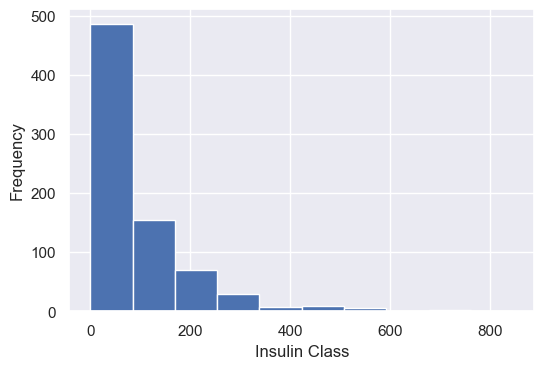

In [24]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('Insulin Class')
df['Insulin'].plot.hist()
print("Mean of Insulin is :-", df['Insulin'].mean())
print("Datatype of Insulin Variable is:",df['Insulin'].dtypes)

In [25]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# Week 2

Data Exploration:

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.
2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.
3. Perform correlation analysis. Visually explore it using a heat map.

Count of class is:
 0    500
1    268
Name: Outcome, dtype: int64
We can see that both class is balanced so we need not to perform any sampling method to maintain the balance between both classes. Therefor i will be directly using this data in training and testing purpose without performing any sampling method. Meanwhile during Model Validation , we also need not worry abour ROC Curve because data is not imbalanced, but as this is a medical data so i will be using ROC curve to make sure TYPE 2 ERROR will not be there.



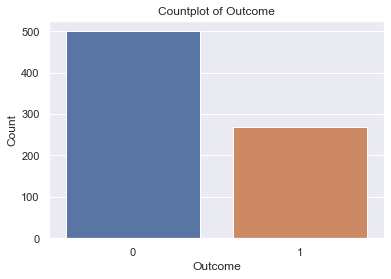

In [27]:
sns.countplot(df['Outcome'])
plt.title("Countplot of Outcome")
plt.xlabel('Outcome')
plt.ylabel("Count")
print("Count of class is:\n",df['Outcome'].value_counts())
print("We can see that both class is balanced so we need not to perform any sampling method to maintain the balance between both classes. Therefor i will be directly using this data in training and testing purpose without performing any sampling method. Meanwhile during Model Validation , we also need not worry abour ROC Curve because data is not imbalanced, but as this is a medical data so i will be using ROC curve to make sure TYPE 2 ERROR will not be there.\n")

We can see from scatter plot that there is no strong multicolinearity among features, but between skin thickness and BMI, Pregnancies and age it looks like there is small chance of positive correlation..i will explore more when analyzing correlation



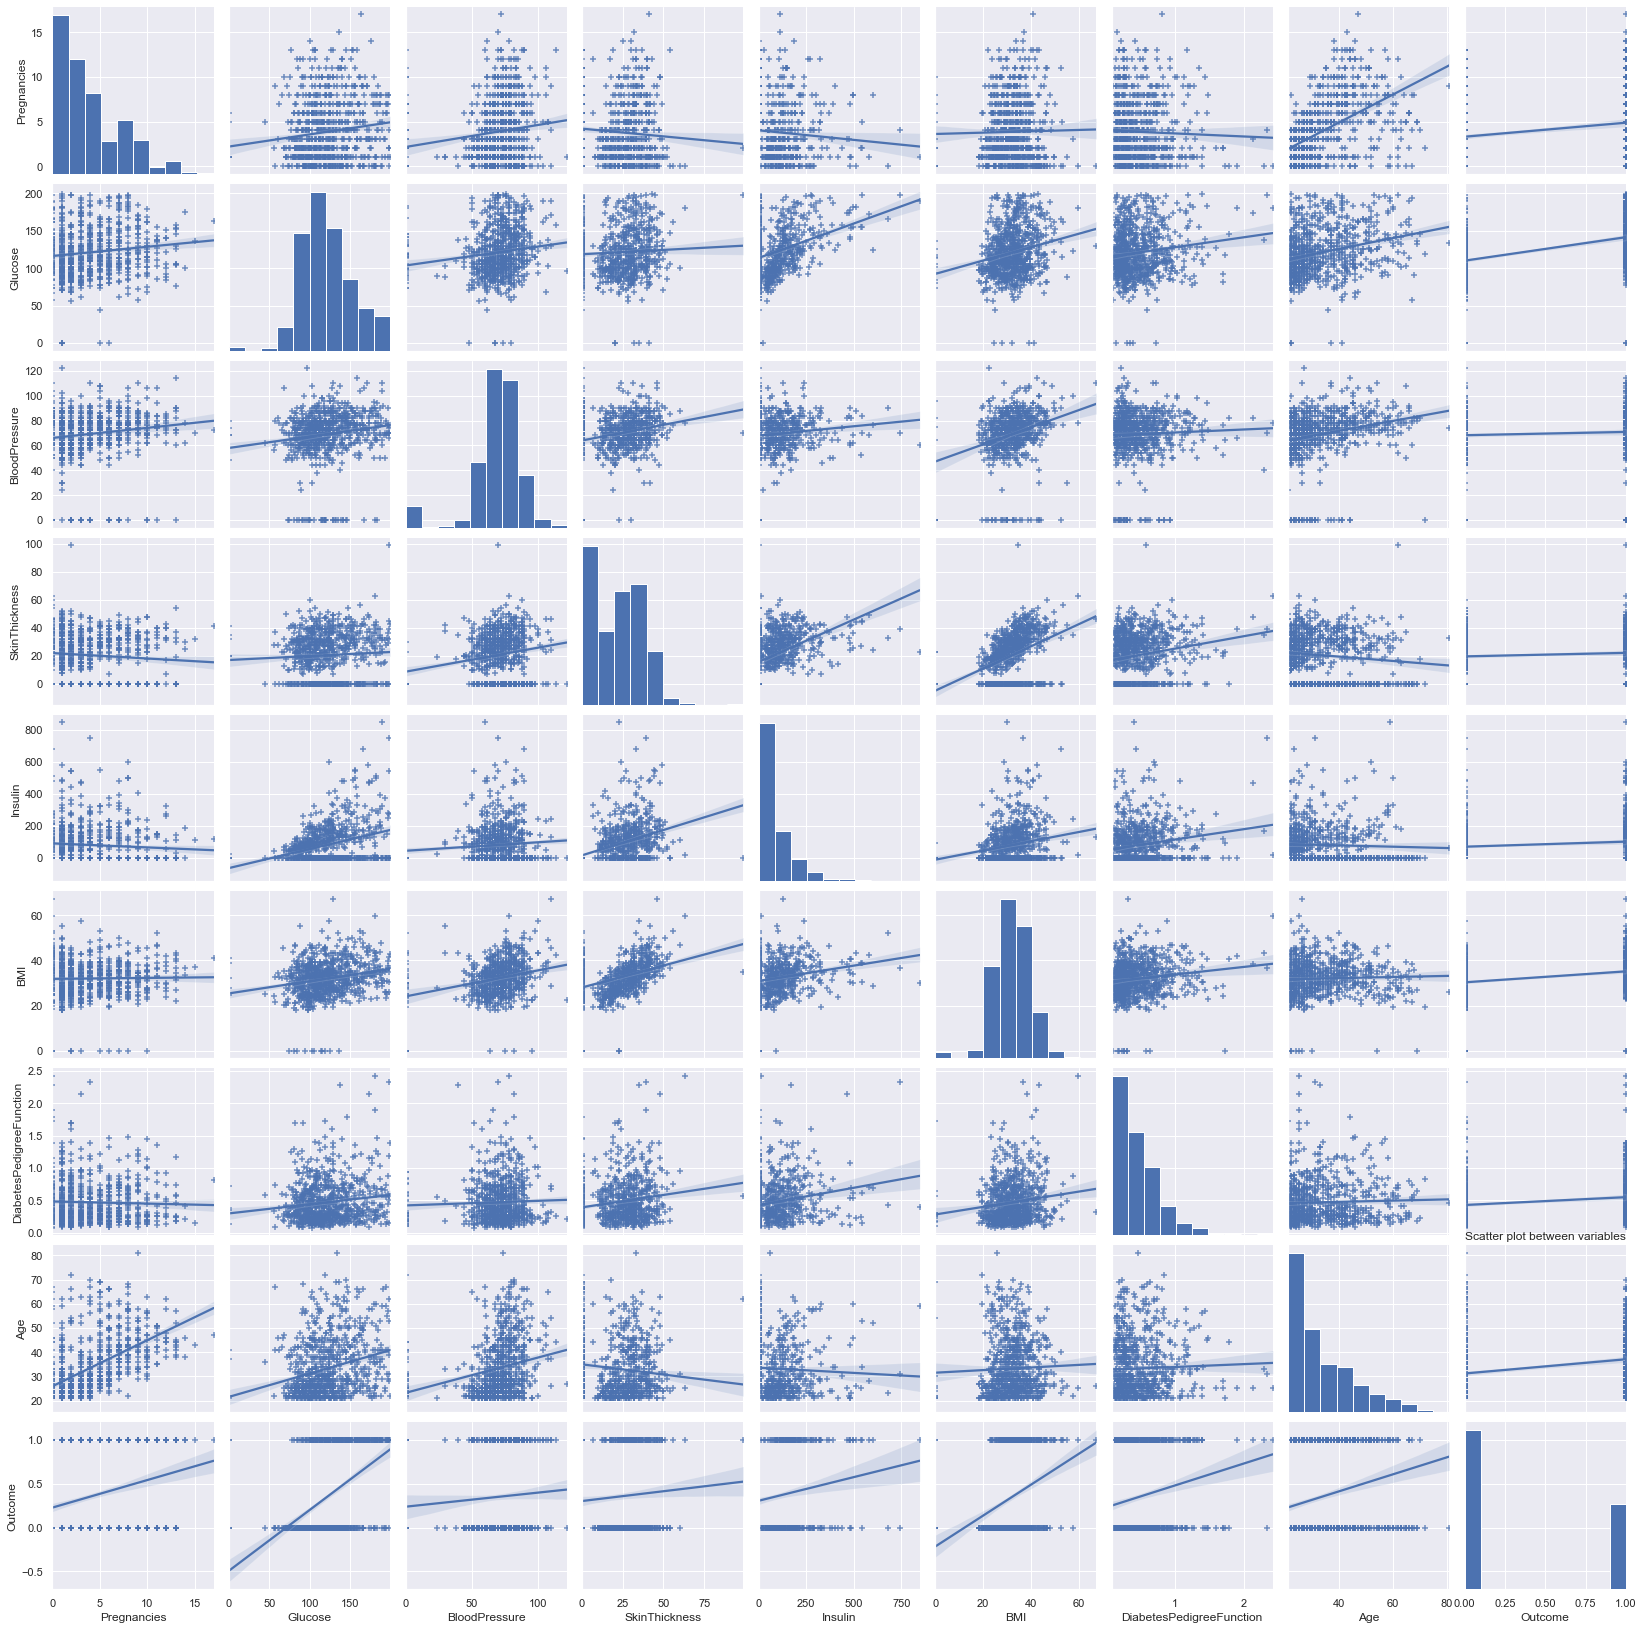

In [28]:
sns.pairplot(df, kind="reg", markers="+")
plt.title('Scatter plot between variables')
print("We can see from scatter plot that there is no strong multicolinearity among features, but between skin thickness and BMI, Pregnancies and age it looks like there is small chance of positive correlation..i will explore more when analyzing correlation\n")

We can clearly see that Glucose and BMI has good impact on outcome. There is a strong positive correlation between BMI and Skinthickness or Pregnancies and age



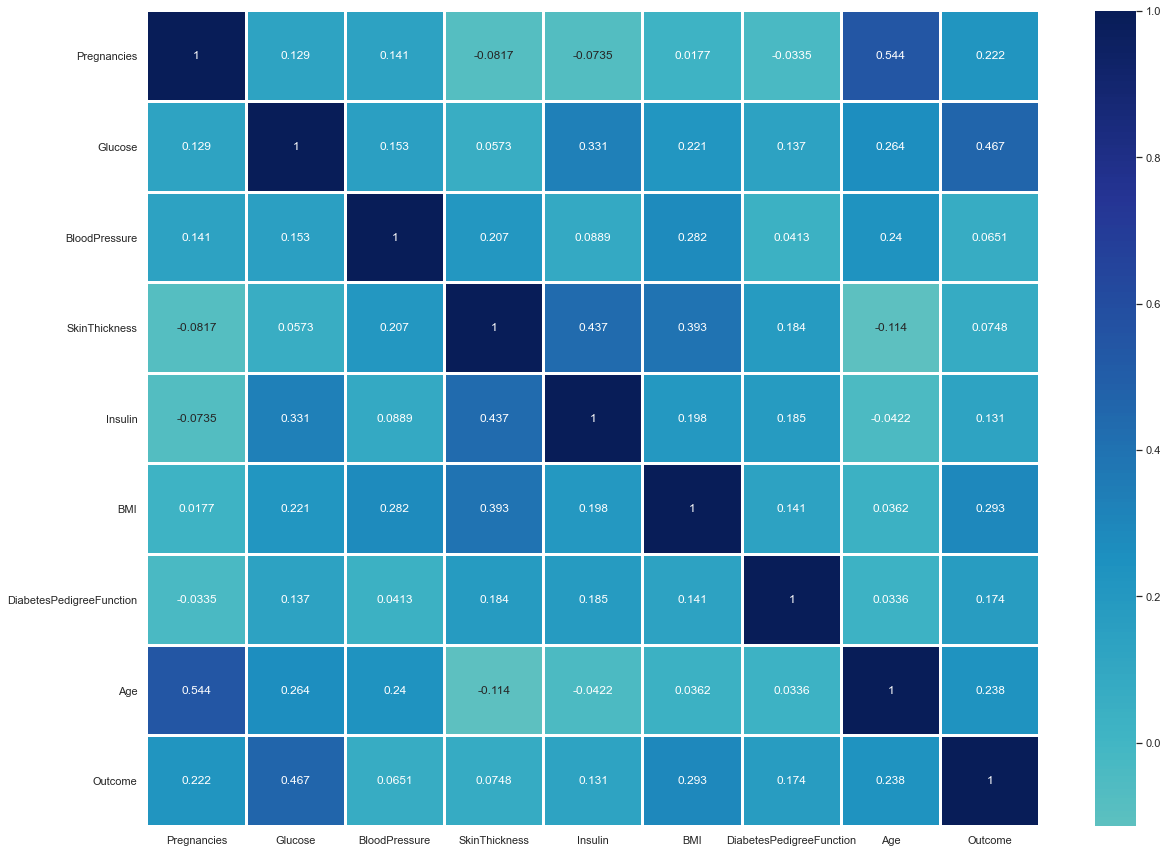

In [29]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), center=0, annot=True, fmt ='.3g', linewidths=2,linecolor='white',cmap="YlGnBu")
print("We can clearly see that Glucose and BMI has good impact on outcome. There is a strong positive correlation between BMI and Skinthickness or Pregnancies and age\n")

# Week3

Data Modeling:

1. Devise strategies for model building. It is i0mportant to decide the right validation framework. Express your thought process.
2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

In [30]:
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']

##### Calculating relevent field for traning and further exploration

In [31]:
rf = RandomForestClassifier()
rf.fit(X,y)
rf.feature_importances_
less_importance_columns = ['Pregnancies','BloodPressure','SkinThickness','Insulin']
X.drop(less_importance_columns,inplace=True, axis=1)
# Pregnancies 	Glucose 	BloodPressure 	SkinThickness 	Insulin 	BMI 	DiabetesPedigreeFunction 	Age

In [32]:
X.head()

,Glucose,BMI,DiabetesPedigreeFunction,Age
0,148,33.6,0.627,50
1,85,26.6,0.351,31
2,183,23.3,0.672,32
3,89,28.1,0.167,21
4,137,43.1,2.288,33


In [33]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler() # MaxAbsScaler, StandardScaler, Normalizer
# scaler = StandardScaler()

In [35]:
scaler.fit(X)

MinMaxScaler()

In [36]:
X = scaler.transform(X)

In [37]:
X

array([[0.74371859, 0.50074516, 0.23441503, 0.48333333],
       [0.42713568, 0.39642325, 0.11656704, 0.16666667],
       [0.91959799, 0.34724292, 0.25362938, 0.18333333],
       ...,
       [0.6080402 , 0.390462  , 0.07130658, 0.15      ],
       [0.63316583, 0.4485842 , 0.11571307, 0.43333333],
       [0.46733668, 0.45305514, 0.10119556, 0.03333333]])

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=1)

*Data is mostly numerical and in such scenario , Logistic Regression works fine. We have also seen in week 2 that variables are depending on target somewhat linearly, So this is also good for Logistic Regression. I will be also using Support Vector Classifier, Random Forest (Ensemble Learning) to see if i can improve accuracy. Note these learning algorithm also works on linear data very well. To validate model i will be using train test split, for accuracy i will be using accuracy using confusion matrix because classes are balanced and i will be also considering ROC Curve and ROC AUC Score to make sure Type 2 Error will not occur for Positive class, that is 1*

### KNeighborsClassifier

In [39]:
neigh = KNeighborsClassifier(n_neighbors=25,algorithm='auto',weights='distance',n_jobs=4)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=4, n_neighbors=25, weights='distance')

Training Accuracy 1.0
Testing Accuracy 0.7987012987012987
f1 score 0.693069306930693
confusion matrix : [[88 20]
 [11 35]] 

Accuracy Score 0.7987012987012987


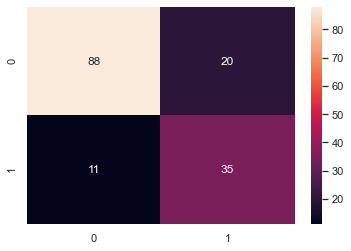

In [40]:
y_predict_neigh = neigh.predict(X_test)
print("Training Accuracy",neigh.score(X_train,y_train))
print("Testing Accuracy",neigh.score(X_test,y_test))
print("f1 score",f1_score(y_test, y_predict_neigh))
cm_knn = confusion_matrix(y_predict_neigh,y_test)
print("confusion matrix :", cm_knn,"\n")
sns.heatmap(cm_knn,annot=True)
print("Accuracy Score",accuracy_score(y_predict_neigh,y_test))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154
 



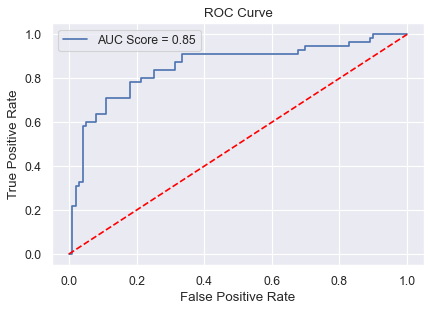

In [41]:
print(classification_report(y_test,y_predict_neigh),"\n")
neigh_prob_linear=neigh.predict_proba(X_test)
neigh_prob_linear1=neigh_prob_linear[:,1]
fpr,tpr,thresh=roc_curve(y_test,neigh_prob_linear1)
roc_auc_neigh=auc(fpr,tpr)

plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_neigh)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

### SVC

In [42]:
svc = SVC(C=1.0, gamma= 1,kernel='rbf',probability=True)
svc.fit(X_train, y_train)

SVC(gamma=1, probability=True)

Training Accuracy 0.7785016286644951
Testing Accuracy 0.8311688311688312
f1 score 0.7291666666666666
confusion matrix :
 [[93 20]
 [ 6 35]] 

Accuracy Score 0.8311688311688312


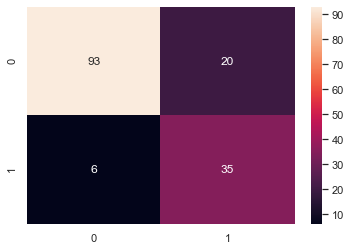

In [43]:
y_predict_svc = svc.predict(X_test)
print("Training Accuracy",svc.score(X_train,y_train))
print("Testing Accuracy",svc.score(X_test,y_test))
print("f1 score",f1_score(y_test, y_predict_svc))
cm_svc = confusion_matrix(y_predict_svc,y_test)
print("confusion matrix :\n", cm_svc,"\n")
sns.heatmap(cm_svc,annot=True)
print("Accuracy Score",accuracy_score(y_predict_svc,y_test))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88        99
           1       0.85      0.64      0.73        55

    accuracy                           0.83       154
   macro avg       0.84      0.79      0.80       154
weighted avg       0.83      0.83      0.82       154
 



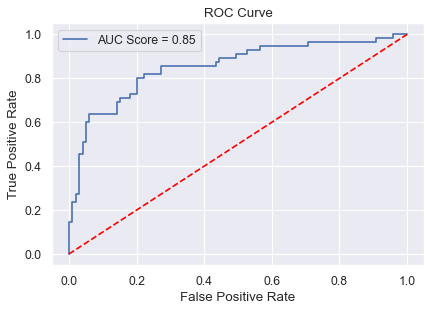

In [44]:
print(classification_report(y_test,y_predict_svc),"\n")
svc_prob_linear=svc.predict_proba(X_test)
svc_prob_linear1=svc_prob_linear[:,1]
fpr,tpr,thresh=roc_curve(y_test,svc_prob_linear1)
roc_auc_svc=auc(fpr,tpr)

plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_svc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [45]:
# validation accuracy of SVC model is higher than KNN but ROC remails same that is 0.85

### Random Forest Classifier

In [46]:
rfc = RandomForestClassifier(max_depth=2, random_state=0, n_jobs=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_jobs=4, random_state=0)

Training Accuracy 0.7736156351791531
Testing Accuracy 0.7662337662337663
f1 score 0.6249999999999999
confusion matrix : [[88 25]
 [11 30]] 

Accuracy Score 0.7662337662337663


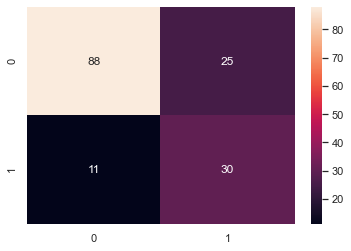

In [47]:
y_predict_rfc = rfc.predict(X_test)
print("Training Accuracy",rfc.score(X_train,y_train))
print("Testing Accuracy",rfc.score(X_test,y_test))
print("f1 score",f1_score(y_test, y_predict_rfc))
cm_rfc = confusion_matrix(y_predict_rfc,y_test)
print("confusion matrix :", cm_rfc,"\n")
sns.heatmap(cm_rfc,annot=True)
print("Accuracy Score",accuracy_score(y_predict_rfc,y_test))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        99
           1       0.73      0.55      0.62        55

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154
 



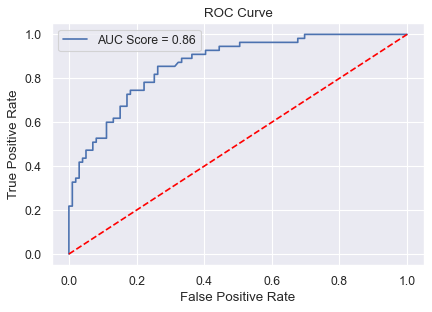

In [48]:
print(classification_report(y_test,y_predict_rfc),"\n")
rfc_prob_linear=rfc.predict_proba(X_test)
rfc_prob_linear1=rfc_prob_linear[:,1]
fpr,tpr,thresh=roc_curve(y_test,rfc_prob_linear1)
roc_auc_rfc=auc(fpr,tpr)

plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_rfc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [49]:
# validation accuracy of Randome forest model is less than KNN but roc score is little more

### Gaussian Naive Bayes classifier

In [50]:
gnbclf = GaussianProcessClassifier(n_jobs=4)

In [51]:
gnbclf.fit(X_train, y_train)

GaussianProcessClassifier(n_jobs=4)

Training Accuracy 0.7671009771986971
Testing Accuracy 0.7857142857142857
f1 score 0.6451612903225806
confusion matrix : [[91 25]
 [ 8 30]] 

Accuracy Score 0.7857142857142857


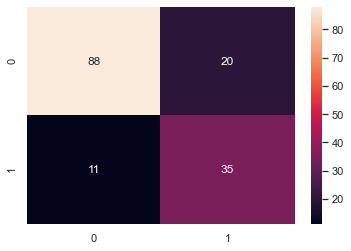

In [52]:
y_predict_gnbclf = gnbclf.predict(X_test)
print("Training Accuracy",gnbclf.score(X_train,y_train))
print("Testing Accuracy",gnbclf.score(X_test,y_test))
print("f1 score",f1_score(y_test, y_predict_gnbclf))
cm_gnbclf = confusion_matrix(y_predict_gnbclf,y_test)
print("confusion matrix :", cm_gnbclf,"\n")
sns.heatmap(cm_knn,annot=True)
print("Accuracy Score",accuracy_score(y_predict_gnbclf,y_test))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85        99
           1       0.79      0.55      0.65        55

    accuracy                           0.79       154
   macro avg       0.79      0.73      0.75       154
weighted avg       0.79      0.79      0.77       154
 



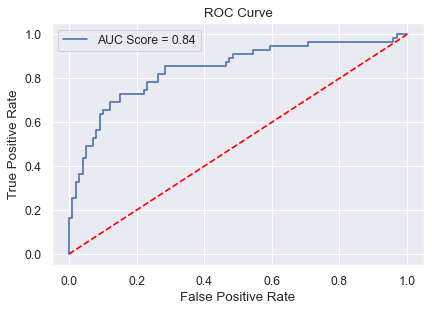

In [53]:
print(classification_report(y_test,y_predict_gnbclf),"\n")
gnbclf_prob_linear=gnbclf.predict_proba(X_test)
gnbclf_prob_linear1=gnbclf_prob_linear[:,1]
fpr,tpr,thresh=roc_curve(y_test,gnbclf_prob_linear1)
roc_auc_gnbclf=auc(fpr,tpr)

plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_gnbclf)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [54]:
# both roc score and validation accuracy of gaussian nave bayes classifier is lesser than KNN.

### Stochastic Gradient Descent

In [55]:
sgdclf = SGDClassifier(loss="log", penalty="l2", max_iter=50, n_jobs=4)
sgdclf.fit(X_train, y_train)

SGDClassifier(loss='log', max_iter=50, n_jobs=4)

Training Accuracy 0.7719869706840391
Testing Accuracy 0.7727272727272727
f1 score 0.6067415730337079
confusion matrix : [[92 28]
 [ 7 27]] 

Accuracy Score 0.7727272727272727


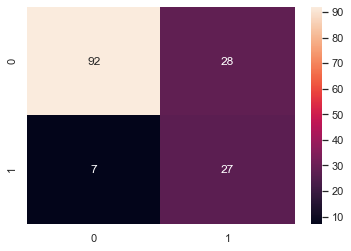

In [56]:
y_predict_sgdclf = sgdclf.predict(X_test)
print("Training Accuracy",sgdclf.score(X_train,y_train))
print("Testing Accuracy",sgdclf.score(X_test,y_test))
print("f1 score",f1_score(y_test, y_predict_sgdclf))
cm_sgdclf = confusion_matrix(y_predict_sgdclf,y_test)
print("confusion matrix :", cm_sgdclf,"\n")
sns.heatmap(cm_sgdclf,annot=True)
print("Accuracy Score",accuracy_score(y_predict_sgdclf,y_test))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84        99
           1       0.79      0.49      0.61        55

    accuracy                           0.77       154
   macro avg       0.78      0.71      0.72       154
weighted avg       0.78      0.77      0.76       154
 



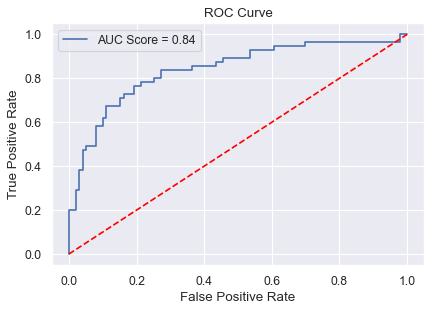

In [57]:
print(classification_report(y_test,y_predict_sgdclf),"\n")
sgdclf_prob_linear=sgdclf.predict_proba(X_test)
sgdclf_prob_linear1=sgdclf_prob_linear[:,1]
fpr,tpr,thresh=roc_curve(y_test,sgdclf_prob_linear1)
roc_auc_sgdclf=auc(fpr,tpr)

plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_sgdclf)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [58]:
# both roc score and validation accuracy of SGD classifier is lesser than KNN.

### Data Modeling:
#### 1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

##### classification accuracy

In [59]:
print("Training Accuracy: ",rfc.score(X_train,y_train))
print("Testing Accuracy: ",rfc.score(X_test,y_test))
print("f1 score: ",f1_score(y_test, y_predict_rfc))
# cm_rfc = confusion_matrix(y_predict_rfc,y_test)
print("confusion matrix :\n", cm_rfc)
print("Accuracy Score",accuracy_score(y_predict_rfc,y_test))

Training Accuracy:  0.7736156351791531
Testing Accuracy:  0.7662337662337663
f1 score:  0.6249999999999999
confusion matrix :
 [[88 25]
 [11 30]]
Accuracy Score 0.7662337662337663


##### Classification accuracy is 76.6%
##### Null accuracy: accuracy that could be achieved by always predicting the most frequent class

In [60]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    99
1    55
Name: Outcome, dtype: int64

In [61]:
# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
y_test.mean()

0.35714285714285715

In [62]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6428571428571428

In [63]:
# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
max(y_test.mean(), 1 - y_test.mean())

0.6428571428571428

##### This means that model that always predicts 0 would be right 68% of the time

In [64]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.642857
Name: Outcome, dtype: float64

In [65]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25]) # Actual outcome
print('False:', y_predict_rfc[0:25]) # predicted outcome

True: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0]
False: [0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0]


##### AUC (ROC curve)
##### AUC is the percentage of the ROC plot that is underneath the curve
##### A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        99
           1       0.73      0.55      0.62        55

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154
 

AUC Score = 0.8634527089072543


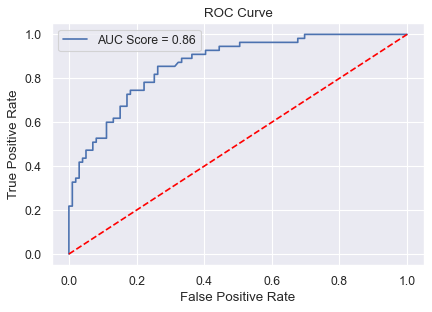

In [66]:
print(classification_report(y_test,y_predict_rfc),"\n")
# predict probabilities
rfc_prob_linear=rfc.predict_proba(X_test)
# keep probabilities for the positive outcome only
rfc_prob_linear1=rfc_prob_linear[:,1]
fpr,tpr,threshold=roc_curve(y_test,rfc_prob_linear1)
# print(fpr,tpr,threshold)
roc_auc_rfc=auc(fpr,tpr)
print("AUC Score =", roc_auc_rfc)

plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_rfc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

##### It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate.
##### This function requires the true binary value and the target scores, which can either be probability estimates of the positive class, confidence values, or binary decisions

##### *    AUC is useful as a single number summary of classifier performance
##### *    Higher value = better classifier
##### *    If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation
##### *    AUC is useful even when there is high class imbalance (unlike classification accuracy)

##### *   ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context
##### *    You can't actually see the thresholds used to generate the curve on the ROC curve itself

#### Used parameter value are output of roc_curve( Compute the area under the ROC curve ) function
##### * fpr : Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i].
##### * tpr : Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i].
##### * thresholds : Decreasing thresholds on the decision function used to compute fpr and tpr. thresholds[0] represents no instances being predicted and is arbitrarily set to max(y_score) + 1

In [67]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(thresh):
    print('Sensitivity:', tpr[threshold > thresh][-1])
    print('Specificity:', 1 - fpr[threshold > thresh][-1])

In [68]:
evaluate_threshold(0.5)

Sensitivity: 0.5272727272727272
Specificity: 0.8888888888888888


In [69]:
evaluate_threshold(0.3)

Sensitivity: 0.8909090909090909
Specificity: 0.6666666666666667


In [70]:
cross_val_score(rfc, X, y, cv=10, scoring='roc_auc', n_jobs=5).mean()

0.8236039886039886

### Data Reporting:
####    2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

[link to Tableau Public!](https://public.tableau.com/profile/sarvesh.vishwakarma#!/vizhome/DataScienceCapstone/PieChart?publish=yes)

OR Refer pdf file for Tableau Output